In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def preprocessing(name, clase):
    df = pd.read_csv(f'../data/{name}.csv')
    time_data = {}
    attempts = df['attempt'].unique()

    for attempt in attempts:
        time_data['time_between_keys_attempt_'+str(attempt)] = df[df['attempt']==attempt]['timestamp']
        time_data['time_between_keys_attempt_'+str(attempt)] = list(time_data['time_between_keys_attempt_'+str(attempt)].diff().fillna(0).values)
    data  = [i[1:] for i in list(time_data.values())]
    df_preprocessed = pd.DataFrame(data,columns=['i','i-n','n','n-e','e','e-t','t','t-u','u','u-m','m'])
    df_preprocessed['y'] = clase
    return df_preprocessed

In [27]:
df_preprocessed_nacho = preprocessing('keystroke_data_nacho', 0)
df_preprocessed_nacho.head()

,i,i-n,n,n-e,e,e-t,t,t-u,u,u-m,m,y
0,0.071363,0.139884,0.082787,0.109803,0.090845,0.175198,0.070994,0.100003,0.081004,0.161244,0.095009,0
1,0.071539,0.143534,0.070614,0.181013,0.070993,0.282007,0.087003,0.089002,0.070664,0.134271,0.091921,0
2,0.070997,0.143755,0.072264,0.110359,0.091707,0.183996,0.081002,0.151625,0.085555,0.192004,0.066007,0
3,0.116001,0.108550,0.070982,0.080003,0.111000,0.130003,0.075011,0.135996,0.074005,0.191042,0.119998,0
4,0.101999,0.144212,0.081118,0.100682,0.100852,0.169358,0.055292,0.140579,0.081002,0.120007,0.105997,0


In [29]:
df_preprocessed_jorge = preprocessing('keystroke_data_jorge', 1)
df_preprocessed_jorge.head()

,i,i-n,n,n-e,e,e-t,t,t-u,u,u-m,m,y
0,0.053028,0.176164,0.066606,0.036560,0.070551,0.142976,0.051978,0.205242,0.058472,0.173178,0.070760,1
1,0.080405,0.204409,0.071139,0.059927,0.081230,0.140076,0.065133,0.170876,0.050734,0.210920,0.065274,1
2,0.071274,0.170590,0.080953,0.049480,0.071998,0.123422,0.071750,0.169895,0.070995,0.206555,0.060729,1
3,0.062655,0.193000,0.073514,0.037000,0.069999,0.144261,0.063665,0.188704,0.052005,0.233469,0.047210,1
4,0.074681,1.237337,0.080008,0.080990,0.081256,0.122080,0.060995,0.191018,0.060982,0.189454,0.066799,1


In [30]:
df_preprocessed_nacho.mean()[:-1]

i      0.086866
i-n    0.149424
n      0.080256
n-e    0.053118
e      0.112612
e-t    0.095394
t      0.091363
t-u    0.064751
u      0.091945
u-m    0.151803
m      0.109444
dtype: float64

In [31]:
df_preprocessed_jorge.mean()[:-1]

i      0.065703
i-n    0.226609
n      0.074390
n-e    0.061387
e      0.078718
e-t    0.161632
t      0.063534
t-u    0.223274
u      0.061668
u-m    0.221434
m      0.068516
dtype: float64

In [32]:
df_preprocessed_nacho.mean()[:-1].sum()

1.0869766759872437

In [33]:
df_preprocessed_jorge.mean()[:-1].sum()

1.306866021156311

In [48]:
def mostrar_series(df):
    plt.figure(figsize=(10, 6))

    for index, row in df.iterrows():
        plt.plot(row, label=f'Serie {index + 1}')

    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Series Temporales')
    plt.show()

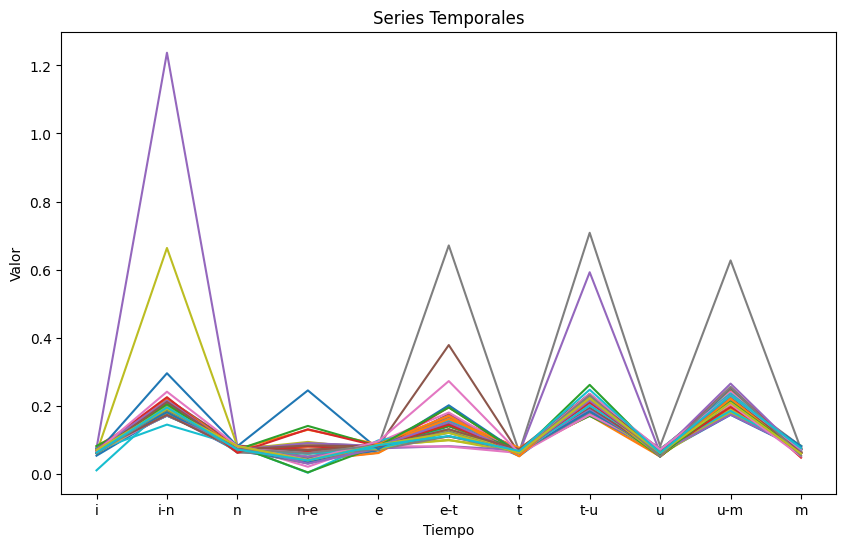

In [50]:
mostrar_series(df_preprocessed_jorge.iloc[:,:-1])

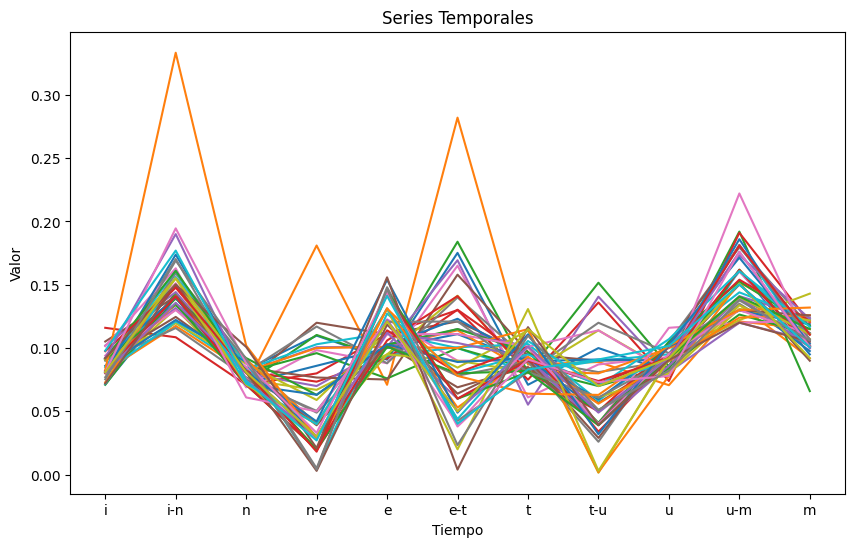

In [49]:
mostrar_series(df_preprocessed_nacho.iloc[:,:-1])

In [52]:
def split_df(df):
    df_letras = df[['i', 'n', 'e', 't', 'u', 'm']]
    df_espacios = df[['i-n', 'n-e', 'e-t', 't-u', 'u-m']]
    return (df_letras, df_espacios)

In [53]:
(df_letras_jorge, df_espacios_jorge) = split_df(df_preprocessed_jorge)

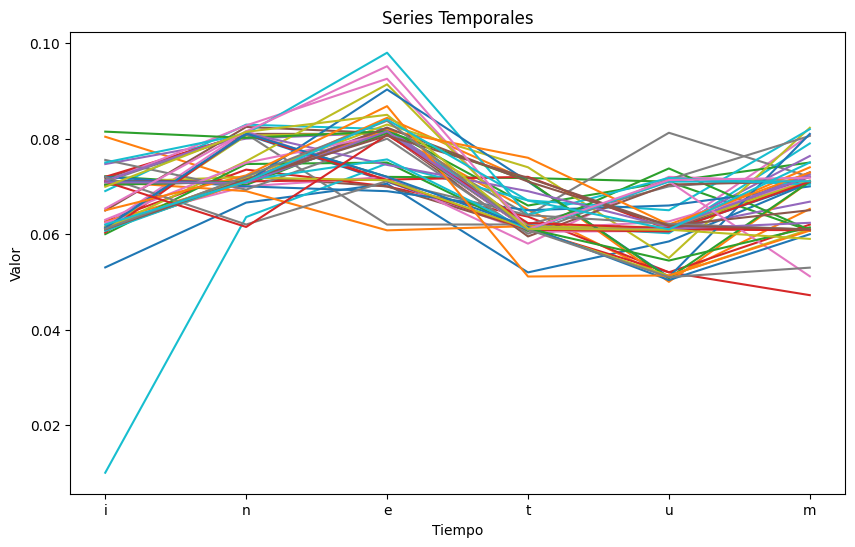

In [54]:
mostrar_series(df_letras_jorge)

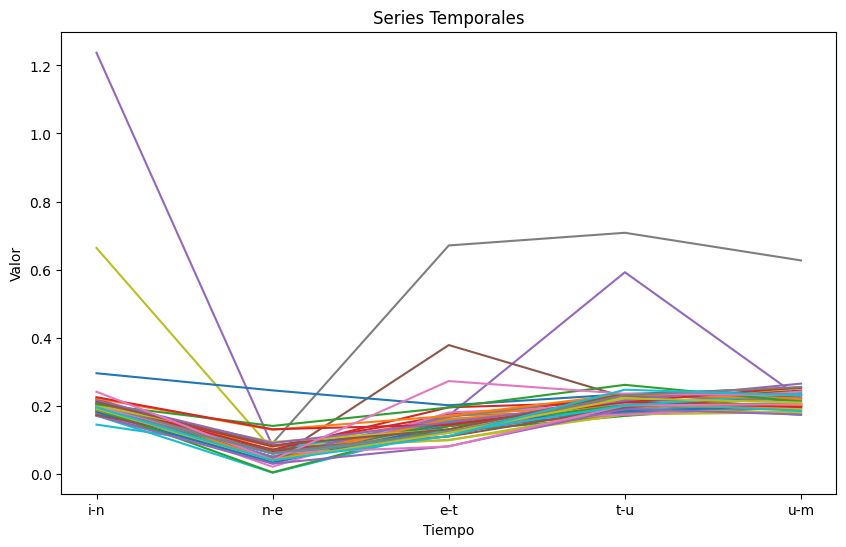

In [55]:
mostrar_series(df_espacios_jorge)

In [56]:
(df_letras_nacho, df_espacios_nacho) = split_df(df_preprocessed_nacho)

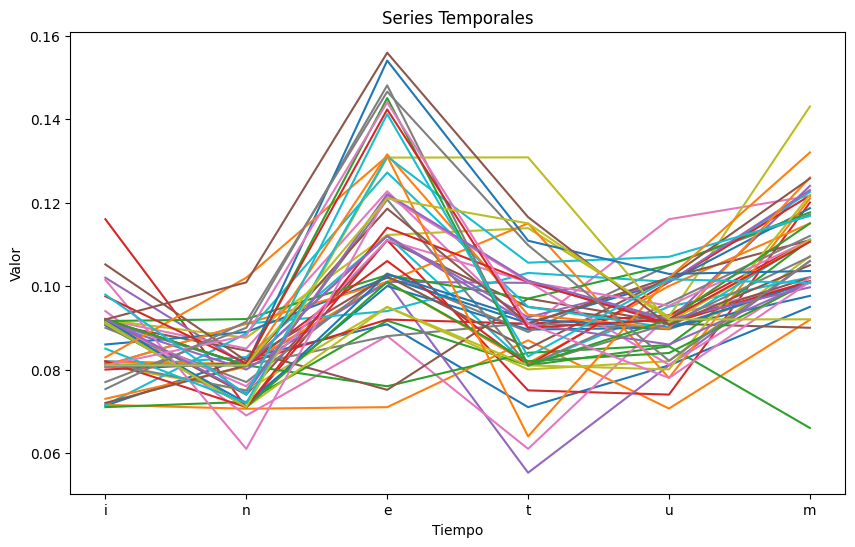

In [57]:
mostrar_series(df_letras_nacho)

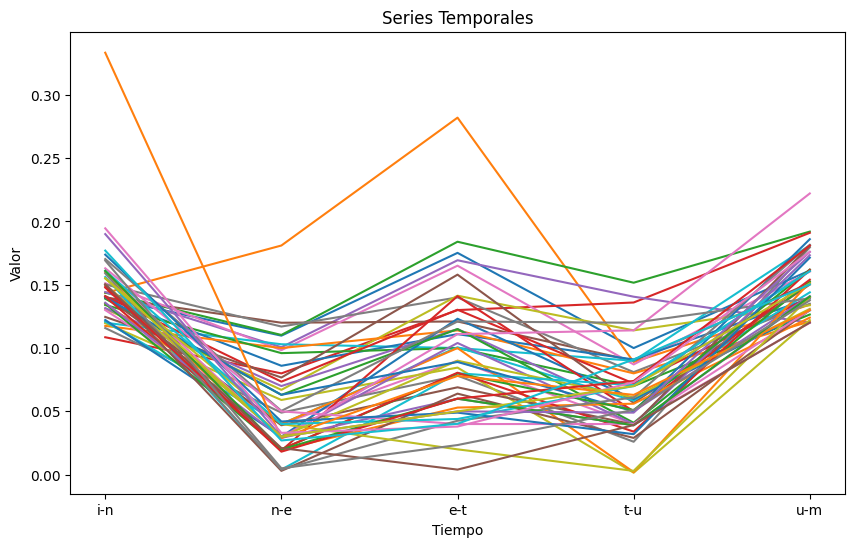

In [58]:
mostrar_series(df_espacios_nacho)

In [74]:
def comparar_series(df1, df2):
    plt.figure(figsize=(10, 6))

    for index, row in df1.iterrows():
        plt.plot(row, label=f'Serie {index + 1} jorge', color = 'blue')

    for index, row in df2.iterrows():
        plt.plot(row, label=f'Serie {index + 1} nacho', color = 'red')

    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Series Temporales')
    plt.show()


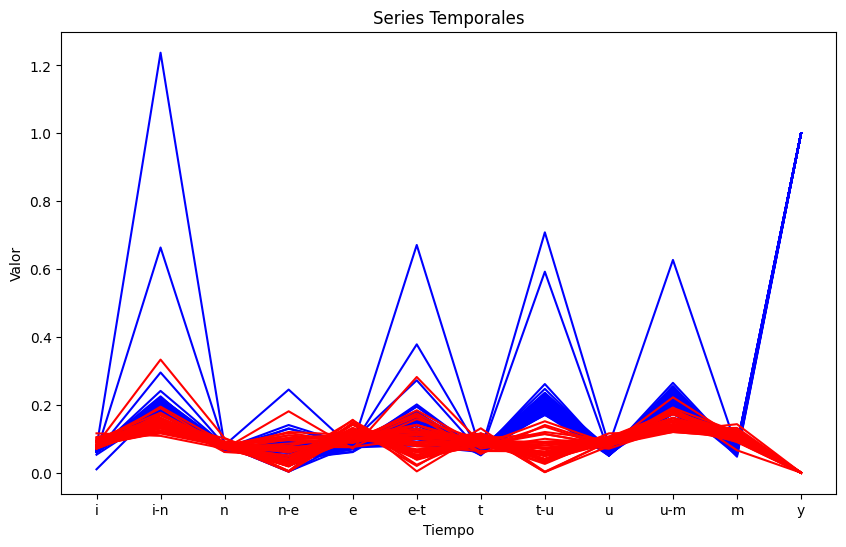

In [77]:
comparar_series(df_preprocessed_jorge, df_preprocessed_nacho)

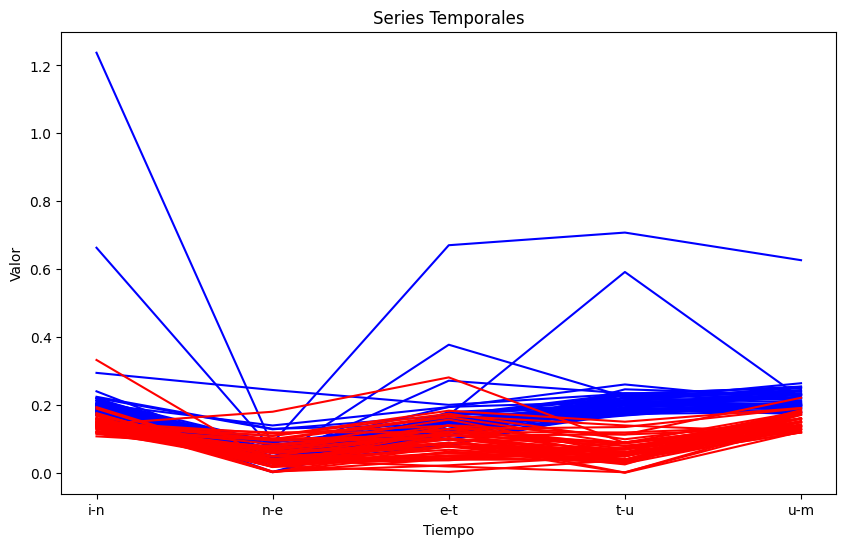

In [75]:
comparar_series(df_espacios_jorge, df_espacios_nacho)

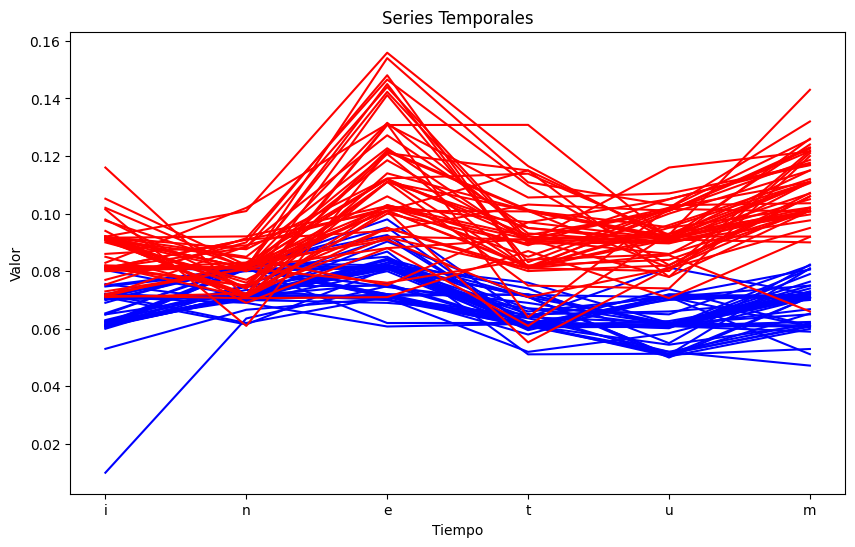

In [76]:
comparar_series(df_letras_jorge, df_letras_nacho)